## Topic Model Results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle("C:\\Users\\UKE12399093\\GIT\\NLP\\US Presedential Speeches\\final_df.pkl")

In [53]:
df.head(10)

,index,sentence,speech,president,speech_date,Regime change,Military Support,Fighting Al Qaeda,Democracy Promotion,Bolstering Iraqi Security Forces,...,Middle East Security,Freedom,Al Qaeda,Middle East Terrorism Threat,Religious Liberty,roberta_neg,roberta_neu,roberta_pos,YearMonth,YRMNTH
0,0,Good afternoon.,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.091866,0.020608,-0.013549,0.012241,0.129675,...,-0.019216,0.057875,-0.051857,0.021145,0.035125,0.015199,0.193120,0.791681,July 2021,202107
1,1,"Earlier today, I was briefed by our senior mil...",Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.462341,0.170909,0.502308,0.706292,0.296541,...,-0.120064,0.599147,-0.025133,0.397244,0.183778,0.036000,0.936791,0.027209,July 2021,202107
2,2,"When I announced our drawdown in April, I said...",Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.164941,0.084289,0.384271,0.428225,0.433138,...,0.486977,0.124019,0.236934,0.134657,0.774891,0.002977,0.512427,0.484597,July 2021,202107
3,3,Our military mission in Afghanistan will concl...,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.294849,0.466644,0.720763,0.41306,0.481794,...,0.32805,0.036519,0.448192,0.367726,0.666796,0.021283,0.952112,0.026605,July 2021,202107
4,4,The drawdown is proceeding in a secure and ord...,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.166568,0.59265,0.154344,-0.28015,0.251566,...,-0.209066,0.491736,-0.196509,0.079829,-0.286824,0.011207,0.428847,0.559946,July 2021,202107
5,5,Our military commanders advised me that once I...,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.07379,0.409005,0.142683,-0.116069,0.062206,...,0.690335,0.377438,0.295861,0.118202,-0.058214,0.126221,0.843664,0.030115,July 2021,202107
6,6,"And in this context, speed is safety.",Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.23961,-0.03765,-0.241951,-0.272218,0.364561,...,-0.238409,-0.367949,-0.456665,-0.40595,-0.223951,0.033741,0.711399,0.254859,July 2021,202107
7,7,And thanks to the way in which we have managed...,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,-0.251648,0.159876,0.277859,0.234949,-0.176445,...,0.428651,0.424363,0.290548,0.142397,0.357757,0.159624,0.651551,0.188825,July 2021,202107
8,8,Conducting our drawdown differently would have...,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,-0.179814,0.091123,0.243277,0.217134,0.309907,...,0.380313,-0.025115,0.420105,0.215146,0.883993,0.620268,0.368953,0.010780,July 2021,202107
9,9,"To me, those risks were unacceptable.",Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,-0.120029,0.143085,0.186712,0.005766,-0.136049,...,0.627646,-0.120476,0.981618,0.623716,0.313058,0.953766,0.043718,0.002516,July 2021,202107


In [54]:
df['sentence'][5]

'Our military commanders advised me that once I made the decision to end the war, we needed to move swiftly to conduct the main elements of the drawdown.'

*A cosine value of 0 means that the two vectors are at 90 degrees to each other (orthogonal) and have no match. The closer the cosine value to 1, the smaller the angle and the greater the match between vectors.*

---

### Visualise the Average similarity scores for each Topic

In [86]:
selected_df = df.iloc[:,[2,3,5,6,7,8,9,10,11,12,13,14,15]]

In [87]:
selected_df.head(10)

,speech,president,Regime change,Military Support,Fighting Al Qaeda,Democracy Promotion,Bolstering Iraqi Security Forces,Al Qaeda Downturn,Middle East Security,Freedom,Al Qaeda,Middle East Terrorism Threat,Religious Liberty
0,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.091866,0.020608,-0.013549,0.012241,0.129675,0.121716,-0.019216,0.057875,-0.051857,0.021145,0.035125
1,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.462341,0.170909,0.502308,0.706292,0.296541,0.224687,-0.120064,0.599147,-0.025133,0.397244,0.183778
2,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.164941,0.084289,0.384271,0.428225,0.433138,0.283634,0.486977,0.124019,0.236934,0.134657,0.774891
3,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.294849,0.466644,0.720763,0.41306,0.481794,-0.027502,0.32805,0.036519,0.448192,0.367726,0.666796
4,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.166568,0.59265,0.154344,-0.28015,0.251566,0.446406,-0.209066,0.491736,-0.196509,0.079829,-0.286824
5,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.07379,0.409005,0.142683,-0.116069,0.062206,0.195165,0.690335,0.377438,0.295861,0.118202,-0.058214
6,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.23961,-0.03765,-0.241951,-0.272218,0.364561,-0.205136,-0.238409,-0.367949,-0.456665,-0.40595,-0.223951
7,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,-0.251648,0.159876,0.277859,0.234949,-0.176445,0.281015,0.428651,0.424363,0.290548,0.142397,0.357757
8,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,-0.179814,0.091123,0.243277,0.217134,0.309907,0.40624,0.380313,-0.025115,0.420105,0.215146,0.883993
9,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,-0.120029,0.143085,0.186712,0.005766,-0.136049,-0.130568,0.627646,-0.120476,0.981618,0.623716,0.313058


In [109]:
selected_df.shape

(2293, 13)

In [88]:
pivot_df = pd.DataFrame(selected_df.pivot(columns=['speech', 'president']).mean()).reset_index()

In [89]:
pivot_df

,level_0,speech,president,0
0,Regime change,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.166486
1,Regime change,Remarks on Situation in Afghansitan,Joe Biden,0.187009
2,Regime change,Statement on Terror Attacks in Afghanistan,Joe Biden,0.158459
3,Regime change,Remarks on National Security Strategy,Donald Trump,0.218236
4,Regime change,Statement on Iran,Donald Trump,0.223758
...,...,...,...,...
193,Religious Liberty,Remarks on Freedom in Iraq and Middle East,George Bush,0.205250
194,Religious Liberty,Address on Military Operations in Iraq,George Bush,0.188378
195,Religious Liberty,Remarks on the War on Terror,George Bush,0.213945
196,Religious Liberty,Address on Renewal in Iraq,George Bush,0.238394


In [90]:
pivot_df.rename(columns={'level_0':'Topic Label', 0:'Average Similarity Score'}, inplace=True)

In [91]:
grouped_df = pd.DataFrame(pivot_df.groupby(['Topic Label'])['Average Similarity Score'].mean().sort_values(ascending=False))

In [92]:
grouped_df = grouped_df.sort_values(by='Average Similarity Score', ascending=False).reset_index()

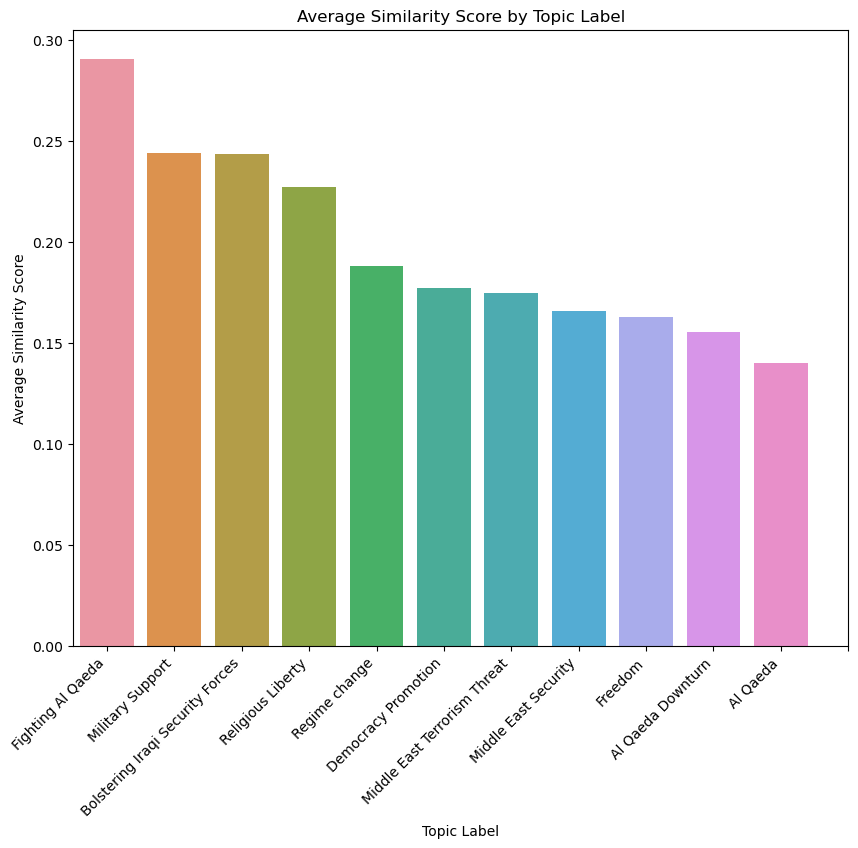

In [94]:
fig = sns.barplot(data=grouped_df, x='Topic Label', y='Average Similarity Score')
plt.rcParams['figure.figsize']= (10,8)
plt.xticks(ticks=[i for i in range(0,12)] ,rotation=45, ha='right')
plt.title("Average Similarity Score by Topic Label")
plt.show(fig)

---

### Visualise the Average similarity scores for each Speech with each Topic 

In [134]:
heatmap_df = df.iloc[:,[2,3,5,6,7,8,9,10,11,12,13,14,15,19,20]]
heatmap_df

,speech,president,Regime change,Military Support,Fighting Al Qaeda,Democracy Promotion,Bolstering Iraqi Security Forces,Al Qaeda Downturn,Middle East Security,Freedom,Al Qaeda,Middle East Terrorism Threat,Religious Liberty,YearMonth,YRMNTH
0,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.091866,0.020608,-0.013549,0.012241,0.129675,0.121716,-0.019216,0.057875,-0.051857,0.021145,0.035125,July 2021,202107
1,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.462341,0.170909,0.502308,0.706292,0.296541,0.224687,-0.120064,0.599147,-0.025133,0.397244,0.183778,July 2021,202107
2,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.164941,0.084289,0.384271,0.428225,0.433138,0.283634,0.486977,0.124019,0.236934,0.134657,0.774891,July 2021,202107
3,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.294849,0.466644,0.720763,0.41306,0.481794,-0.027502,0.32805,0.036519,0.448192,0.367726,0.666796,July 2021,202107
4,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.166568,0.59265,0.154344,-0.28015,0.251566,0.446406,-0.209066,0.491736,-0.196509,0.079829,-0.286824,July 2021,202107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,Remarks on National Security and the War Effort,George Bush,-0.219191,0.230108,0.315848,-0.079737,0.105131,-0.225765,0.63331,-0.37586,0.645601,0.112849,0.605423,July 2004,200407
2289,Remarks on National Security and the War Effort,George Bush,0.306164,-0.045996,-0.165452,-0.206985,0.309835,-0.464891,-0.082501,-0.556862,-0.061615,-0.129418,-0.189807,July 2004,200407
2290,Remarks on National Security and the War Effort,George Bush,-0.002578,0.268779,0.202175,-0.091764,0.431797,0.178318,-0.245486,-0.216041,-0.225712,-0.196265,0.278301,July 2004,200407
2291,Remarks on National Security and the War Effort,George Bush,0.391975,-0.124452,-0.072403,0.098981,0.151401,-0.296112,0.194545,-0.159157,-0.035106,-0.047559,-0.172518,July 2004,200407


In [135]:
heatmap_df['Speech-Pres-Date'] = heatmap_df['speech'] + ': ' + heatmap_df['president'] + ' - ' + heatmap_df['YearMonth']
heatmap_df['Speech-Pres-Date'].unique()

C:\Users\UKE12399093\AppData\Local\Temp\ipykernel_44592\2906616246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_df['Speech-Pres-Date'] = heatmap_df['speech'] + ': ' + heatmap_df['president'] + ' - ' + heatmap_df['YearMonth']


array(['Speech on the Drawdown of US Forces in Afghanistan: Joe Biden - July 2021',
       'Remarks on Situation in Afghansitan: Joe Biden - August 2021',
       'Statement on Terror Attacks in Afghanistan: Joe Biden - August 2021',
       'Remarks on National Security Strategy: Donald Trump - December 2017',
       'Statement on Iran: Donald Trump - January 2020',
       'Statement on the Death of Abu Bakr al-Baghdadi: Donald Trump - October 2019',
       'Iraq Airstrikes and Humanitarian Aid: Barack Obama - August 2014',
       'Speech on Strategy in Afghanistan and Pakistan: Barack Obama - December 2009',
       'Remarks on the End of the War in Iraq: Barack Obama - October 2011',
       'Remarks on the Afghanistan Pullout: Barack Obama - June 2011',
       'American Diplomacy in the Middle East: Barack Obama - May 2011',
       'A Way Forward in Iraq: Barack Obama - November 2006',
       'Address to the Nation on Iraq: George Bush - March 2003',
       'Remarks on Freedom in Iraq 

In [136]:
heatmap_df.head()

,speech,president,Regime change,Military Support,Fighting Al Qaeda,Democracy Promotion,Bolstering Iraqi Security Forces,Al Qaeda Downturn,Middle East Security,Freedom,Al Qaeda,Middle East Terrorism Threat,Religious Liberty,YearMonth,YRMNTH,Speech-Pres-Date
0,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.091866,0.020608,-0.013549,0.012241,0.129675,0.121716,-0.019216,0.057875,-0.051857,0.021145,0.035125,July 2021,202107,Speech on the Drawdown of US Forces in Afghani...
1,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.462341,0.170909,0.502308,0.706292,0.296541,0.224687,-0.120064,0.599147,-0.025133,0.397244,0.183778,July 2021,202107,Speech on the Drawdown of US Forces in Afghani...
2,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.164941,0.084289,0.384271,0.428225,0.433138,0.283634,0.486977,0.124019,0.236934,0.134657,0.774891,July 2021,202107,Speech on the Drawdown of US Forces in Afghani...
3,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.294849,0.466644,0.720763,0.41306,0.481794,-0.027502,0.32805,0.036519,0.448192,0.367726,0.666796,July 2021,202107,Speech on the Drawdown of US Forces in Afghani...
4,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.166568,0.59265,0.154344,-0.28015,0.251566,0.446406,-0.209066,0.491736,-0.196509,0.079829,-0.286824,July 2021,202107,Speech on the Drawdown of US Forces in Afghani...


In [162]:
heatmap_pivot_df =pd.DataFrame(heatmap_df.pivot(columns=['Speech-Pres-Date', 'YRMNTH']).mean()).reset_index().set_index('Speech-Pres-Date').rename(columns={'level_0':'Topic Label', 0:'Average Similarity Score'})

C:\Users\UKE12399093\AppData\Local\Temp\ipykernel_44592\4088463857.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap_pivot_df =pd.DataFrame(heatmap_df.pivot(columns=['Speech-Pres-Date', 'YRMNTH']).mean()).reset_index().set_index('Speech-Pres-Date').rename(columns={'level_0':'Topic Label', 0:'Average Similarity Score'})


In [163]:
heatmap_pivot_df_sorted = heatmap_pivot_df.sort_values(by='YRMNTH', ascending=True)
heatmap_pivot_df_sorted.drop(columns=['YRMNTH'], inplace=True)
heatmap_pivot_df_sorted

,Topic Label,Average Similarity Score
Speech-Pres-Date,,
Address to the Nation on Iraq: George Bush - March 2003,Fighting Al Qaeda,0.281290
Address to the Nation on Iraq: George Bush - March 2003,Middle East Terrorism Threat,0.140040
Address to the Nation on Iraq: George Bush - March 2003,Regime change,0.190708
Address to the Nation on Iraq: George Bush - March 2003,Freedom,0.208377
Address to the Nation on Iraq: George Bush - March 2003,Al Qaeda Downturn,0.252709
...,...,...
Remarks on Situation in Afghansitan: Joe Biden - August 2021,Democracy Promotion,0.214914
Remarks on Situation in Afghansitan: Joe Biden - August 2021,Fighting Al Qaeda,0.354017
Statement on Terror Attacks in Afghanistan: Joe Biden - August 2021,Fighting Al Qaeda,0.295004


In [164]:
heatmap_pivot_df_pivoted = heatmap_pivot_df_sorted.pivot(columns='Topic Label', values='Average Similarity Score')

In [177]:
new_heatmap_index = ['Address to the Nation on Iraq: George Bush - March 2003', 'Remarks on Freedom in Iraq and Middle East: George Bush - November 2003', 
 'Remarks on National Security and the War Effort: George Bush - July 2004', 'Address on Renewal in Iraq: George Bush - December 2005',
 'A Way Forward in Iraq: Barack Obama - November 2006',
 'Address on Military Operations in Iraq: George Bush - January 2007', 'Remarks on the War on Terror: George Bush - March 2008',
 'Speech on Strategy in Afghanistan and Pakistan: Barack Obama - December 2009', 'American Diplomacy in the Middle East: Barack Obama - May 2011',
 'Remarks on the Afghanistan Pullout: Barack Obama - June 2011', 'Remarks on the End of the War in Iraq: Barack Obama - October 2011',
 'Iraq Airstrikes and Humanitarian Aid: Barack Obama - August 2014', 'Remarks on National Security Strategy: Donald Trump - December 2017',
 'Statement on the Death of Abu Bakr al-Baghdadi: Donald Trump - October 2019', 'Statement on Iran: Donald Trump - January 2020',
 'Speech on the Drawdown of US Forces in Afghanistan: Joe Biden - July 2021',
 'Remarks on Situation in Afghansitan: Joe Biden - August 2021', 'Statement on Terror Attacks in Afghanistan: Joe Biden - August 2021'
 ]

In [179]:
heatmap_pivot_df_pivoted = heatmap_pivot_df_pivoted.reindex(new_heatmap_index)

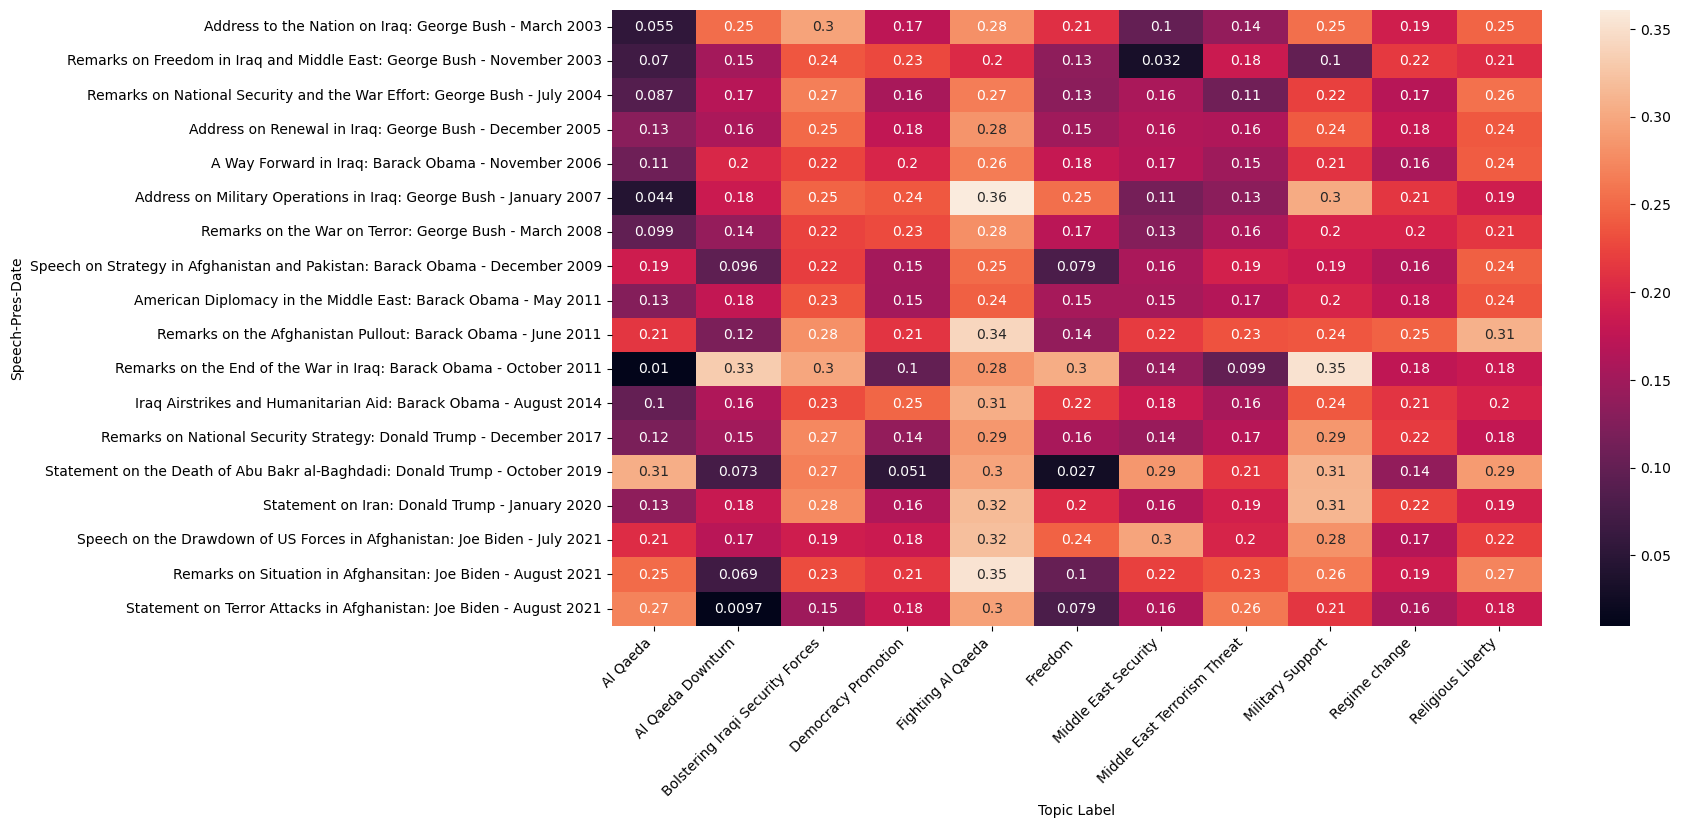

In [181]:
plt.figure(figsize=(15,8))
sns.heatmap(heatmap_pivot_df_pivoted, annot=True)
plt.xticks(rotation=45, ha='right')
plt.show()